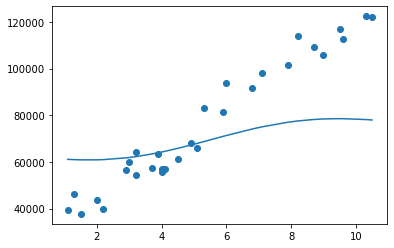

In [1]:
import numpy as np
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.svm import SVR
import matplotlib.pyplot as plt

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_021a87e05013461c90578e71cd237fb4 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_021a87e05013461c90578e71cd237fb4 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_021a87e05013461c90578e71cd237fb4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='09YU4dpfFvJnZ4CeGFEfzHH0Tm_oae1skuWsS896DJQh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_021a87e05013461c90578e71cd237fb4)

body = client_021a87e05013461c90578e71cd237fb4.get_object(Bucket='dicoding-donotdelete-pr-omfn50ikosuvlv',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

x = df['YearsExperience']
y = df['Salary']

x = x[:,np.newaxis]
model = SVR(C=1000, gamma=0.05, kernel='rbf') #masukkan parameter
model.fit(x,y)

plt.scatter(x, y)
plt.plot(x, model.predict(x))

{'C': 0.5, 'kernel': 'rbf'}


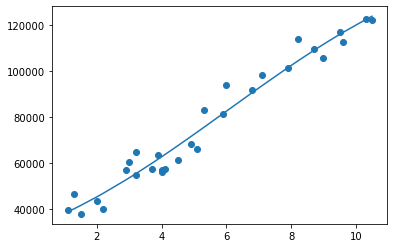

In [7]:
import numpy as np
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_021a87e05013461c90578e71cd237fb4 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_021a87e05013461c90578e71cd237fb4 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_021a87e05013461c90578e71cd237fb4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='09YU4dpfFvJnZ4CeGFEfzHH0Tm_oae1skuWsS896DJQh',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_021a87e05013461c90578e71cd237fb4)

body = client_021a87e05013461c90578e71cd237fb4.get_object(Bucket='dicoding-donotdelete-pr-omfn50ikosuvlv',Key='Salary_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

x = df['YearsExperience']
y = df['Salary']

x = x[:,np.newaxis]
model = SVR()
parameters = {'kernel': ['rbf'], 'C': [1000, 10000, 100000], 'C': [0.5, 0.05, 0.005]}
grid_search = GridSearchCV(model, parameters)
grid_search.fit(x, y)

print(grid_search.best_params_)

model_baru = SVR(C=100000, gamma=0.005, kernel='rbf') #masukkan parameter
model_baru.fit(x,y)

plt.scatter(x, y)
plt.plot(x, model_baru.predict(x))

In [10]:
import pandas as pd

Penyanyi = pd.DataFrame({'Name': ['Isyana Syarasvati', 'Nicholas Saputra', 'Raisa Andriana'], 'Age': [30, 36, 32]})
print('Penyanyi Indonesia: \n', Penyanyi)
Penyanyi[['First', 'Last']] = Penyanyi.Name.str.split(expand=True)
print("\n Split kolom 'Name', kemudian tambahkan kedua kolom : \n", Penyanyi)

Penyanyi Indonesia: 
                 Name  Age
0  Isyana Syarasvati   30
1   Nicholas Saputra   36
2     Raisa Andriana   32

 Split kolom 'Name', kemudian tambahkan kedua kolom : 
                 Name  Age     First        Last
0  Isyana Syarasvati   30    Isyana  Syarasvati
1   Nicholas Saputra   36  Nicholas     Saputra
2     Raisa Andriana   32     Raisa    Andriana
